In [1]:
import os
import numpy as np
import pandas as pd
import h5py
import pylab as P

# Show charts in notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Set main model directory to parent directory
model_dir = os.path.dirname(os.getcwd()) 

In [3]:
# Read Model Scenario Results
scen = h5py.File(model_dir + r'/outputs/daysim_outputs.h5','r+')
scen_name = 'Model: 2040'

In [4]:
# Read Base Data
base_file = r'/inputs/hh_and_persons.h5'

base = h5py.File(model_dir + base_file ,'r+')
base_name = '2006 Survey'

In [5]:
####################
# Household Size
####################

In [16]:
# Summarize Household Size

# Age distribution
hhsize_scen = np.asarray(scen['Household']['hhsize'])
hhsize_base = np.asarray(base['Household']['hhsize'])

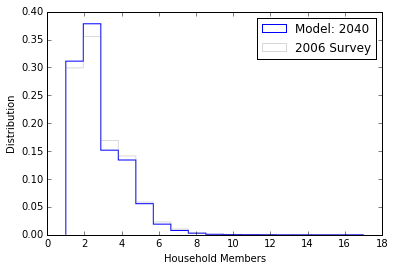

In [17]:
# Household Size Distribution
bins = ages_scen.max()

# Set model results to boldest (alpha default to 1)
P.hist(ages_scen, bins=bins, normed=True, histtype='step', color='b', label=scen_name)

# Compare with survey estimates (alpha < 0.5); Currently using fake data...
P.hist(ages_base, bins=bins, normed=True, histtype='step', color='grey', alpha=0.3, label=base_name)
P.xlabel('Household Members')
P.ylabel('Distribution')
P.legend()

In [25]:
print "Average household size for Scenario: " + str(hhsize_scen.mean().round(3))
print "Max household size for Scenario: " + str(bins)

Average household size for Scenario: 2.399
Max household size for Scenario: 17


In [14]:
####################
# Household Income
####################

In [26]:
# Summarize Household Income Distribution

hhinc_scen = np.asarray(scen['Household']['hhincome'])
hhinc_base = np.asarray(base['Household']['hhincome'])

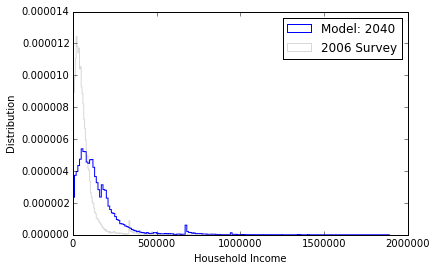

In [32]:
# Household Income Distribution
bins = hhinc_scen.max()/10000

# Set model results to boldest (alpha default to 1)
P.hist(hhinc_scen, bins=bins, normed=True, histtype='step', color='b', label=scen_name)

# Compare with survey estimates (alpha < 0.5); Currently using fake data...
P.hist(hhinc_base, bins=bins, normed=True, histtype='step', color='grey', alpha=0.3, label=base_name)
P.xlabel('Household Income')
P.ylabel('Distribution')
P.legend()

In [44]:
print "Average household income for SCENARIO: " + str(int(hhinc_scen.mean()))
print "Average household income for BASE: " + str(int(hhinc_base.mean()))
print ""
print "Median household income for SCNEARIO: " + str(int(np.median(hhinc_scen)))
print "Median household income for BASE: " + str(int(np.median(hhinc_base)))

Average household income for SCENARIO: 148741
Average household income for BASE: 64344

Median household income for SCNEARIO: 112921
Median household income for BASE: 48400


In [ ]:
####################
# Residence Type
####################

In [64]:
# Worker type
type_var = 'hrestype'    # Assuming this is same as base as in scenario

hrestype_scen = np.asarray(scen['Household'][type_var])
hrestype_base = np.asarray(base['Household'][type_var])

restype_labels = {
  0: "Error",  
  1: "Detached single house",
  2: "Duplex/triplex/rowhouse",
  3: "Apartment/condo",
  4: "Mobile home/trailer",
  5: "Dorm room/rented room",
  6: "Other",
  9: "Missing",
}

In [80]:
# Sum by residence type for scenario results
df = pd.DataFrame(hrestype_scen, columns=[type_var])
df['Residence Type'] = [restype_labels[x] for x in df[type_var].as_matrix()]

# Ignore "0" (missing) response
df = df.query("hrestype <> 0")
restypes_scen = df.groupby('Residence Type').count()[type_var]     # Sum by category
restypes_scen = restypes_scen/restypes_scen.sum()     # Convert totals to shares

In [84]:
# Sum by worker type for base
df = pd.DataFrame(hrestype_base, columns=[type_var])
df['Residence Type'] = [restype_labels[x] for x in df[type_var].as_matrix()]

# Ignore "0" (missing) response
df = df.query("hrestype <> 0")
restypes_base = df.groupby('Residence Type').count()[type_var]    # Sum by category
restypes_base = restypes_base/restypes_base.sum()     # Convert totals to shares

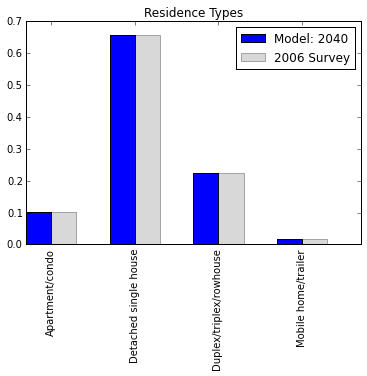

In [96]:
# Set bar chart params
ind = np.arange(len(restypes_scen))    # index array to match dataset size
width = 0.3    # width of bars

fig, ax = P.subplots()    # Initialize bar chart object

res_scen = ax.bar(ind, restypes_base.values, width=width, color='b')    # plot scenario data
res_base = ax.bar(ind+width, restypes_base.values, width=width, color='grey', alpha=0.3)    # plot base data (note the index offset by the bar width)
ax.set_xticks(ind+width)   
ax.set_xticklabels(restypes_scen.index, rotation=90)
ax.set_title('Residence Types')

ax.legend((res_scen, res_base), (scen_name, base_name))

In [ ]:
####################
# Own vs. Rent
####################